# Метод максимального правдоподобия

## Оценка одномерной выборки

In [3]:
import numpy as np 

size = 10000 # Number of observations
mu = 3 # Mean
sigma = 2 # Standard deviation 
sample = np.random.normal(loc=mu, scale=sigma, size=size)

### Явное решение

In [4]:
mu_hat = sample.mean()
sigma_hat = np.sqrt(
        np.sum(
            (sample - sample.mean())**2
        ) 
        / size
    )

print(f"Estimated mu: {mu_hat}")
print(f"Estimated sigma: {sigma_hat}")

Estimated mu: 3.0228084873142964
Estimated sigma: 2.020068990595901


### Численное решение

In [19]:
    
def log_likelihood_factory(sample: np.ndarray):

    def log_likelihood(params):
        mu, sigma = params

        n = len(sample)

        lik =   - 0.5 * n * np.log(2 * np.pi) \
                - 0.5 * n * np.log(sigma ** 2) \
                - (0.5 / sigma **2) * np.sum(
                (sample - mu)**2
            ) 
        
        # For maximization
        return  - lik
    
    return log_likelihood


def log_likelihood_grad_factory(sample: np.ndarray):

    def log_likelihood_grad(params):
        mu, sigma = params

        n = len(sample)

        mu_part =  (1 / sigma **2) * (np.sum(sample) - n * mu)
        sigma_part =  (0.5 / sigma **2) \
                        *  ((1 / sigma **2) *np.sum((sample - mu)**2) - n)
        
        # For maximization
        return - np.array([mu_part, sigma_part])
    
    return log_likelihood_grad

In [20]:
from scipy.optimize import minimize

x0 = np.random.uniform(size=2)
res = minimize(
    log_likelihood_factory(sample), 
    x0,
    jac=log_likelihood_grad_factory(sample)
)

In [21]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 21220.70197794907
        x: [ 3.023e+00  2.020e+00]
      nit: 25
      jac: [-8.503e-06 -7.346e-06]
 hess_inv: [[ 4.039e-04 -7.262e-06]
            [-7.262e-06  8.117e-04]]
     nfev: 29
     njev: 29

## Марковская цепь

In [22]:
class MarkovChain:

    def __init__(self, nodes: list[int], transition_matrix: np.):

    def 

n_nodes = 5

nodes = [i for i in range(n_nodes)]

adjacency_matrix = np.zeros([n_nodes, n_nodes])

for node in nodes:

    other_nodes = [x for x in nodes if x != node]

    n_other_nodes = len(other_nodes)

    n_neighbours = np.random.randint(1, n_other_nodes)
    neighbours = np.random.choice(other_nodes, n_neighbours, replace=False)

    logits = np.random.uniform(size=n_neighbours)

    probs = logits / logits.sum()

    # Just to fix floating point error
    # Sum now will be 1.0 instead of 0.999999
    probs[0] += 1-probs.sum()

    for (neighbour, prob) in zip(neighbours, probs):
        adjacency_matrix[node, neighbour] = prob
    


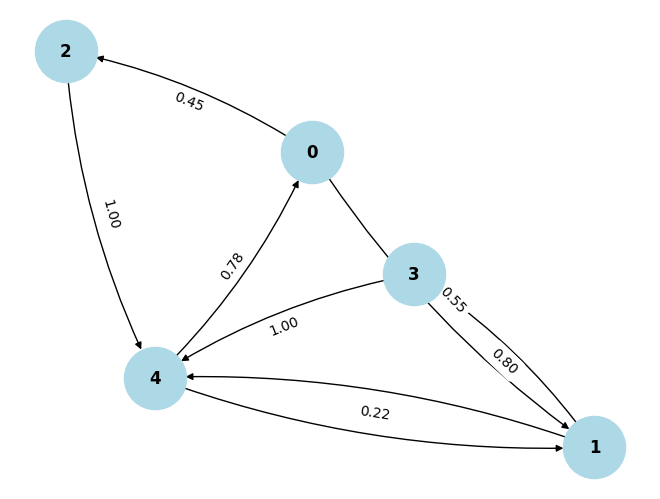

In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def visualize_markov_chain(nodes, adj_matrix):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes to the graph
    for node in nodes:
        G.add_node(node)

    # Add edges with probabilities
    for i, start_node in enumerate(nodes):
        for j, end_node in enumerate(nodes):
            probability = adj_matrix[i, j]
            if probability > 0:
                G.add_edge(start_node, end_node, weight=probability, label=f"{probability:.2f}")

    # Position the nodes using a layout
    pos = nx.spring_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold', arrows=True, connectionstyle='arc3,rad=0.1')

    # Draw edge labels (probabilities)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Show the plot
    plt.show()


visualize_markov_chain(nodes, adjacency_matrix)


### Генерация триаектории

### Явное решение

### Численное решение